In [1]:
import lxml, csv, requests, json, os, glob, collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/Theo/Desktop/14-18/"
os.chdir(path)

In [3]:
nominative = glob.glob(path + "1_base_nominative_complet/" + "*.csv")
annotation = glob.glob(path + "1_base_nominative_annotation_complet/" + "*.csv")

In [4]:
li2 = [pd.read_csv(filename, encoding='UTF-8', engine="python", sep = ";", quotechar='"', on_bad_lines='warn') for filename in annotation]
MPF_a = pd.concat(li2, axis = 0, ignore_index = True)

Skipping line 9454: ';' expected after '"'
Skipping line 15765: ';' expected after '"'
Skipping line 18654: ';' expected after '"'
Skipping line 22671: ';' expected after '"'
Skipping line 5965: ';' expected after '"'
Skipping line 76640: ';' expected after '"'
Skipping line 1682: ';' expected after '"'
Skipping line 11479: ';' expected after '"'
Skipping line 23272: ';' expected after '"'


In [20]:
MPF_a.shape

(2401318, 20)

In [6]:
print(MPF_a.columns)

Index(['fiche_nom', 'fiche_prenom', 'naissance_jour_mois_annee',
       'id_naissance_departement_intitule', 'id_naissance_pays_intitule',
       'lien_ark_fiche', 'id_grade_intitule', 'id_unite_intitule',
       'id_naissance_lieu_intitule', 'id_recrutement_bureau_intitule',
       'classe', 'recrutement_matricule', 'deces_jour_mois_annee',
       'id_deces_lieu_intitule', 'deces_lieu_complement',
       'id_deces_departement_intitule', 'id_deces_pays_intitule',
       'id_transcription_etablissement_lieu_intitule',
       'id_transcription_etablissement_departement_intitule',
       'id_transcription_etablissement_pays_intitule'],
      dtype='object')


In [7]:
MPF_a.describe()

,fiche_nom,fiche_prenom,naissance_jour_mois_annee,id_naissance_departement_intitule,id_naissance_pays_intitule,lien_ark_fiche,id_grade_intitule,id_unite_intitule,id_naissance_lieu_intitule,id_recrutement_bureau_intitule,classe,recrutement_matricule,deces_jour_mois_annee,id_deces_lieu_intitule,deces_lieu_complement,id_deces_departement_intitule,id_deces_pays_intitule,id_transcription_etablissement_lieu_intitule,id_transcription_etablissement_departement_intitule,id_transcription_etablissement_pays_intitule
count,2401316,2364216,2379196,2168271,2401253,2401318,2083441,2084890,1998092,1944136,1963615,1939836,2401318,2077039,1101401,1874767,1860355,1892044,1797536,1613161
unique,242293,283797,15513,108,146,1408515,959,5241,88758,689,5223,38406,8577,46714,241340,107,162,52984,113,104
top,MARTIN,Jean,1895-00-00,75 - Paris (ex Seine),France,https://www.memoiredeshommes.sga.defense.gouv....,soldat de 2e classe,3e régiment de zouaves (3e RZ),Marseille,Versailles (78),1914,inconnu,0000-00-00,Verdun,Tué à l'ennemi,51 - Marne,France,Marseille,75 - Paris (ex Seine),France
freq,11770,54953,15787,110934,2168625,52,889756,9064,10870,35002,131554,1731,300875,40166,26750,363965,1600643,17476,138473,1518479


In [8]:
li1 = [pd.read_csv(filename, encoding='UTF-8', engine="python", sep = ";", quotechar='"', on_bad_lines='warn',) for filename in nominative]
MPF_n = pd.concat(li1, axis = 0, ignore_index = True)

Skipping line 10214: ';' expected after '"'


In [19]:
MPF_n.shape

(1417219, 80)

In [10]:
print(MPF_n.columns)

Index(['id_conflit_intitule', 'id_sous_conflit_intitule',
       'id_famille_cote_intitule', 'sous_serie', 'serie', 'article', 'nom',
       'prenom', 'nom_autre', 'pseudonyme', 'naissance_jour_mois_annee',
       'id_naissance_lieu_intitule', 'id_naissance_departement_intitule',
       'id_naissance_pays_intitule', 'id_statut_intitule',
       'id_mention_intitule', 'classe', 'recrutement_matricule',
       'id_recrutement_bureau_intitule', 'id_grade_intitule',
       'id_unite_intitule', 'id_bataillon_intitule', 'id_compagnie_intitule',
       'id_batterie_intitule', 'detail_unite', 'id_profession_intitule',
       'deces_jour_mois_annee', 'id_deces_lieu_intitule',
       'id_deces_departement_intitule', 'id_deces_pays_intitule',
       'id_operation_intitule', 'id_transcription_etablissement_lieu_intitule',
       'id_transcription_etablissement_departement_intitule',
       'id_transcription_etablissement_pays_intitule',
       'id_dernier_domicile_lieu_intitule',
       'id_dernie

In [11]:
MPF_n.describe()

,id_sous_conflit_intitule,id_operation_intitule,sepulture_tombe_individuelle_numero,id_sepulture_lieu_premiere_inhumation_intitule,id_lieu_incarceration_intitule,cote,id_region_militaire_intitule,deportation,id_decoration_intitule,decoration_posthume,...,id_disparition_pays_intitule,id_tgi_lieu_intitule,id_tgi_departement_intitule,id_tgi_pays_intitule,id_lieu_ds_hopital,id_lieu_ds_ambulance,id_lieu_ds_secteur_postal,id_lieu_ds_cote,id_lieu_ds_autre_cas,id_lieu_ds_lieu_dit
count,0.0,0.0,19.000000,0.0,0.0,0.0,0.0,1417219.0,0.0,1417219.0,...,0.0,0.0,0.0,0.0,179666.000000,113361.000000,57539.000000,71939.000000,108403.000000,87472.000000
mean,NaN,NaN,941.526316,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,60.975727,5.010268,0.281427,0.432811,14.305185,5.631562
std,NaN,NaN,2371.262706,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,152.071287,26.948099,3.736335,2.726528,54.858274,22.055235
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,11.500000,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,103.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,279.500000,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,10080.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1123.000000,285.000000,127.000000,155.000000,489.000000,220.000000


In [12]:
MPF_n['prenom'].value_counts()

Jean                           32576
Pierre                         22615
Louis                          21360
Joseph                         18127
François                       17249
                               ...  
Fleurant Marie                     1
Henry Joseph Eusèbe                1
Georges Marie Louis Maurice        1
Ferdinand Victor Eugène            1
Boleslas Charles                   1
Name: prenom, Length: 286156, dtype: int64

In [13]:
name_counts=MPF_n['prenom'].value_counts()[0:25]

In [14]:
name_counts

Jean              32576
Pierre            22615
Louis             21360
Joseph            18127
François          17249
Jean Marie        15110
Henri             13691
Jean Baptiste     12083
Antoine            9760
Emile              9008
Paul               8346
Auguste            7762
Charles            7717
Jules              7707
Georges            7669
Léon               7233
Eugène             7017
Pierre Marie       6483
Joseph Marie       6135
Albert             5764
Marcel             5548
Jean Louis         5205
André              4873
François Marie     4660
Maurice            4491
Name: prenom, dtype: int64

<AxesSubplot:ylabel='prenom'>

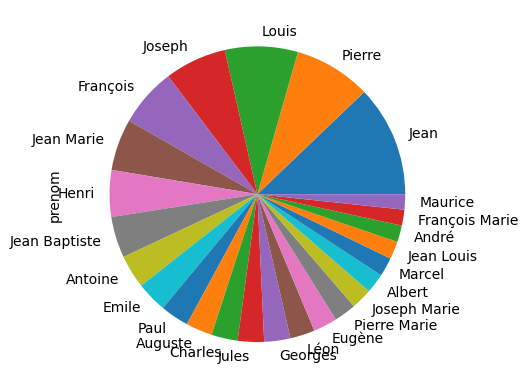

In [15]:
name_counts.plot(kind='pie')

In [16]:
regiments=MPF_a['id_unite_intitule'].value_counts()[0:10]

In [17]:
regiments

3e régiment de zouaves (3e RZ)               9064
2e régiment de zouaves (2e RZ)               8999
153e régiment d'infanterie (153e RI)         8436
151e régiment d'infanterie (151e RI)         8249
94e régiment d'infanterie (94e RI)           8035
4e régiment de marche de zouaves (4e RMZ)    7715
147e régiment d'infanterie (147e RI)         7694
146e régiment d'infanterie (146e RI)         7476
67e régiment d'infanterie (67e RI)           7420
135e régiment d'infanterie (135e RI)         7397
Name: id_unite_intitule, dtype: int64

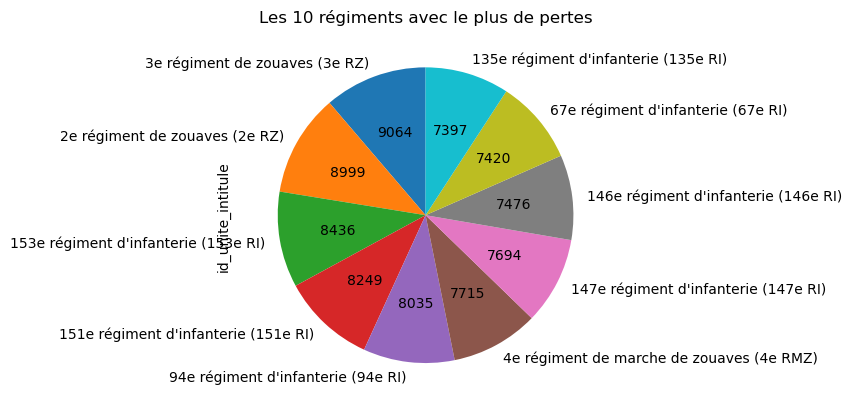

In [18]:
values=MPF_a['id_unite_intitule'].value_counts(dropna=True)[0:10]
pie = regiments.plot(kind="pie", autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
pie.set_title('Les 10 régiments avec le plus de pertes', loc='center')
plt.savefig('pie.png',bbox_inches='tight')

In [41]:
rec = pd.read_excel(path+"REC_T226_I.xls")
rec = rec.iloc[6: , :]
rec.columns = rec.iloc[0]

In [43]:
rec = rec.iloc[1: , :]

In [65]:
rec

6,Nom de l'unité d'analyse,Code de l'unité géographique,Code du département,Code de l'arrondissement,Code du chef-lieu ou de la ville,"Population présente totale, département de naissance : Ain, ensemble, 1911","Population présente totale, département de naissance : Ain, population professionnelle, masculin, 1911","Population présente totale, département de naissance : Ain, population professionnelle, féminin, 1911","Population présente totale, département de naissance : Ain, personnes sans profession, masculin, 1911","Population présente totale, département de naissance : Ain, personnes sans profession, féminin, 1911",...,"Classement des français par département d'origine : Lot, personnes sans profession, féminin, 1911","Classement des français par département d'origine : Lot-et-Garonne, ensemble, 1911","Classement des français par département d'origine : Lot-et-Garonne, population professionnelle, masculin, 1911","Classement des français par département d'origine : Lot-et-Garonne, population professionnelle, féminin, 1911","Classement des français par département d'origine : Lot-et-Garonne, personnes sans profession, masculin, 1911","Classement des français par département d'origine : Lot-et-Garonne, personnes sans profession, féminin, 1911","Classement des français par département d'origine : Lozère, ensemble, 1911","Classement des français par département d'origine : Lozère, population professionnelle, masculin, 1911","Classement des français par département d'origine : Lozère, population professionnelle, féminin, 1911","Classement des français par département d'origine : Lozère, personnes sans profession, masculin, 1911"
7,AIN,1,01,00,00,277803,98093,74896,40367,64447,...,3,20,12,1,3,4,103,59,22,4
8,AISNE,1,02,00,00,99,57,18,6,18,...,17,47,22,8,2,15,41,20,14,1
9,ALLIER,1,03,00,00,182,73,31,25,53,...,52,57,22,7,7,21,199,84,40,16
10,ALPES(BASSES-),1,04,00,00,56,38,10,2,6,...,6,15,6,2,1,6,58,21,26,2
11,ALPES(HAUTES-),1,05,00,00,97,58,7,7,25,...,3,7,2,1,0,4,43,24,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,VIENNE,1,86,00,00,42,21,9,3,9,...,33,93,47,14,6,26,44,18,16,2
90,VIENNE(HAUTE-),1,87,00,00,28,7,4,5,12,...,180,232,103,26,29,74,64,24,12,4
91,VOSGES,1,88,00,00,741,661,14,24,42,...,8,25,8,3,4,10,24,14,3,0
92,YONNE,1,89,00,00,147,71,28,15,33,...,21,35,19,7,2,7,87,45,18,2


In [62]:
ain = pd.DataFrame(rec.loc[7]).transpose()

In [64]:
ain

6,Nom de l'unité d'analyse,Code de l'unité géographique,Code du département,Code de l'arrondissement,Code du chef-lieu ou de la ville,"Population présente totale, département de naissance : Ain, ensemble, 1911","Population présente totale, département de naissance : Ain, population professionnelle, masculin, 1911","Population présente totale, département de naissance : Ain, population professionnelle, féminin, 1911","Population présente totale, département de naissance : Ain, personnes sans profession, masculin, 1911","Population présente totale, département de naissance : Ain, personnes sans profession, féminin, 1911",...,"Classement des français par département d'origine : Lot, personnes sans profession, féminin, 1911","Classement des français par département d'origine : Lot-et-Garonne, ensemble, 1911","Classement des français par département d'origine : Lot-et-Garonne, population professionnelle, masculin, 1911","Classement des français par département d'origine : Lot-et-Garonne, population professionnelle, féminin, 1911","Classement des français par département d'origine : Lot-et-Garonne, personnes sans profession, masculin, 1911","Classement des français par département d'origine : Lot-et-Garonne, personnes sans profession, féminin, 1911","Classement des français par département d'origine : Lozère, ensemble, 1911","Classement des français par département d'origine : Lozère, population professionnelle, masculin, 1911","Classement des français par département d'origine : Lozère, population professionnelle, féminin, 1911","Classement des français par département d'origine : Lozère, personnes sans profession, masculin, 1911"
7,AIN,1,01,00,00,277803,98093,74896,40367,64447,...,3,20,12,1,3,4,103,59,22,4
